### Fill out:
Name & Surname: Chow Chun Kei

Student ID: 33520771

## W7&W8 post studio exercises (multivariate linear regression, regularisation)

Enter your solution in the cell(s) below each exercise. Add couple of inline comments explaining your code. Don't forget to add comments in markdown cell after each exercise. Missing comments (in markdown cells and/or inline) and late submissions will incur penalties.

Once done, drag&drop your python file to your ADS1002-name github account.

Copy url of this file on github to appropriate folder on Moodle by 09.30am prior your next studio. 

Solutions will be released later in the semester.

Max 10 marks - 2.5 marks per each exercise.

We will use diabetes data. Download this data from [the Gitlab site](https://gitlab.erc.monash.edu.au/bads/data-challenges-resources/-/tree/main/Machine-Learning/Supervised-Methods/Regression/Diabetes_Data.csv) into the same directory as the notebook on your computer. 

Run the following code from the pre-studio notebook.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets
from sklearn.linear_model import LinearRegression # models we are going to use
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # for comparing the predicted and test values
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Diabetes_Data.csv', usecols = range(0,11)) # read the Diabetes dataset in to a pandas dataframe
corrs = df.corr()          # calculate the correlation table
X = df.drop(['Y'],axis=1)  # Create a Dataframe without the target variable Y.
Y = df['Y']                # Extract a Series of the target Y values.

In [3]:
# The below code is identical to our first attempt, the only change is
# substituting nX for X in train_test_split, to use our normalised data.
nX =(X-X.mean())/X.std() # create nX, a normalised version of X

# Split into a training set with 80% of the data, and a testing set as the remainder.
X_train, X_test, Y_train, Y_test = train_test_split(
    nX, Y, test_size=0.2,
    random_state=np.random.RandomState(31287)  # Keeps the 'random' split consistent.
) 

# Construct and fit the model
linear = LinearRegression()  # Instantatiate the linear regression model
linear.fit(X_train,Y_train);  # Fit the model parameters to the training data.

In [4]:
from sklearn.model_selection import cross_validate, RepeatedKFold # import sklearn methods

# cross_validate takes the particular model, in this case linear regression which we instantatiated earlier,
# and undertakes a number of runs according the method specified by cv=
# RepeatedKFold splits the data into n sections and repeat the regression modelling 5 times, giving 25 runs
# return_estimator=True returns the fitting data for each run
scores = cross_validate(
    linear, nX, Y,
    cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state=np.random.RandomState(2351786)),
    return_estimator=True,
)
# take the results for each simulation (estimator), extract the coefficients for each run 
# and add them to a dataframe with columns being the feature names
coefs = pd.DataFrame([est.coef_ for est in scores['estimator']],columns=nX.columns)

### Exercise 1 (correlation coefs vs linear regression coefs)

Compare the (mean of) model coefficients computed in the linear regression with the correlation scores found in the initial data analysis in pre-studio notebook. Choose any plot or table which you think is suitable for this comparison. Comment on whether the model fitting results are consistent with the correlation scores.

In [5]:
# Hint 1: Table of correlation coefficients and dataframe with reg. coefs from cross validation are given above.
# Hint 2: Create a dataframe which has the correlations with Y as a column, and then the 
# mean of coefficients computed from the cross_validate method for the other column.
# You will need to scale the coefficients in order to compare this with the correlations (divide by 30, for example). 
# Hint 3: A bar plot seems like a good idea!

<hr>

**Solution:**

In [30]:
# get the initial correlation coefficients of all features towards Y
feature_names = X.columns.tolist()
coefficients = pd.Series(data=linear.coef_.transpose(), index=feature_names)

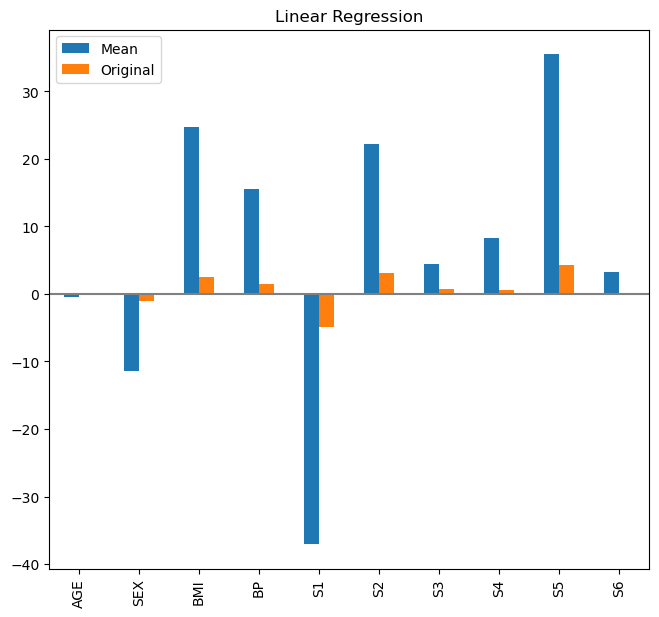

In [38]:
ab = coefs.mean()
# ax = all_coefficients.plot.bar(figsize = (10, 7))

all_coefficients2 = pd.DataFrame({
    'Mean': ab,
    'Original': coefficients/10,
})

# do a similar horizontal plot as before
az = all_coefficients2.plot(kind='bar',figsize=(10,7))
# ax = all_coefficients.plot.bar(figsize = (10, 7))
plt.title('Linear Regression')
plt.axhline(y=0, color='.5')
plt.subplots_adjust(left=.3)

**Analysis**
- Overall the model fitting results are  not consistent with the correlation scores, where the coefficient values differs greatly.
- However, the positive correlation and negative correlation for both models are same (corresponds to each other).
<hr>

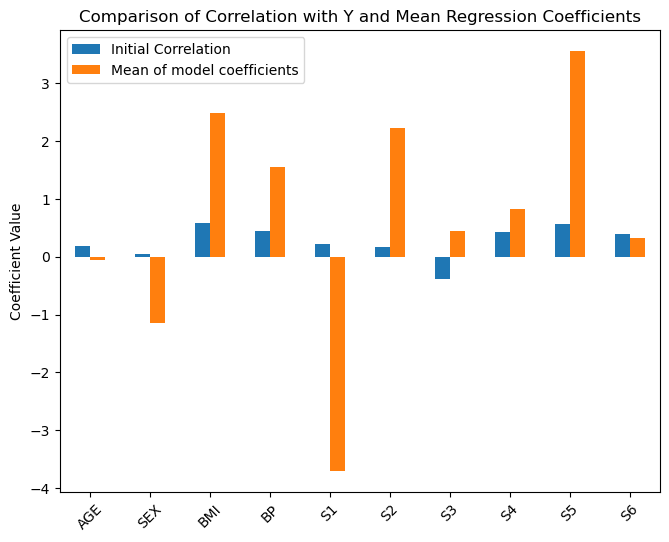

In [47]:
# Calculate correlation coefficients for all features with 'Y' excluding 'Y' itself
corrs_feature = df.corr()['Y'][:-1]  

# Calculate the mean from the cross-validatoin
mean_coefs = coefs.mean() /10

# Create a DataFrame to compare correlation coefficients and mean regression coefficients
comparison_df = pd.DataFrame({
    'Initial Correlation': corrs_feature,
    'Mean of model coefficients': mean_coefs
})

# Plotting 
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Correlation with Y and Mean Regression Coefficients')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.subplots_adjust(left=.3);


### Exercise 2 (coeeficient variability in a simpler model)

Try fitting a linear regression model to a subset of the features. To do this, select 3-4 columns from the normalised dataframe `nX` to use when constructing the train-test split, then fit the model parameters to this new training data as before. Describe how you selected your subset of features. Did the model coefficients for your chosen features turn out to be similar or different to those in the full model given in pre-studio notebook? (Comment on change in variability of the coefficients. If there is a difference, explain why.)

In [6]:
#Settings: 80-20 split, random state 31287.

#Aim is to show variability of corresponding coefficients 
#(train-test-split + cross validation + appropriate plot + compare to pre-studio)

# No regularisation yet.

<hr>

**Solutions:**

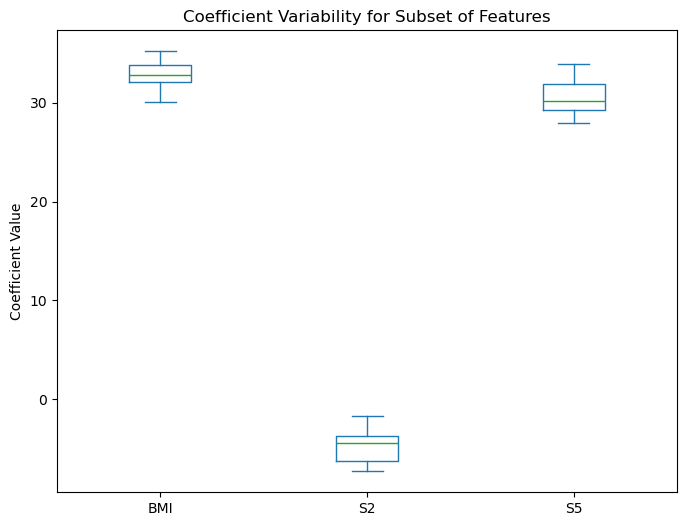

In [53]:
# Selecting a BMI, S2 and S5
subset_features = ['BMI', 'S2', 'S5']  
nX_subset = nX[subset_features]  

# Split the data into training and testing sets with the subset of features
X_train_sub, X_test_sub, Y_train_sub, Y_test_sub = train_test_split(nX_subset, Y, test_size=0.2, random_state=np.random.RandomState(31287))

# Fit the linear regression model
linear_sub = LinearRegression()
linear_sub.fit(X_train_sub, Y_train_sub)

# Cross-validation for the subset model
subset_scores = cross_validate(
    linear_sub, nX_subset, Y,
    cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state=np.random.RandomState(2351786)),
    return_estimator=True,
)

# Extract coefficients from cross-validation runs
subset_coefs = pd.DataFrame([est.coef_ for est in subset_scores['estimator']], columns=subset_features)

# Plot coefficient variability for the subset model
subset_coefs.plot(kind='box', figsize=(8, 6))
plt.title('Coefficient Variability in a Simpler Model')
plt.ylabel('Coefficient Value');

**Analysis**
- The subset features `BMI`, `S2` and `S5` is chosen based on their highest coefficient value with the target, `Y`
- The model coefficient of my chosen model is quite similar to the one shown in the pre-studio notebook, but shows variability:
    - `BMI` and `S5` both have **high coefficient values** in my model and in the one in pre-studio.
    - `S2` in my model has **lower positive coefficient value** as compareed in the pre-studio model, probably because of exclusion of other features may have correlation with `S2`, which affects is coefficient value.

***
In W8 pre-studio notebook we found the optimal tuning parameters ($\alpha$) for both Ridge and Lasso regularisation via numerical experimentation. In practice however, the process of tuning and fitting a linear regression with Ridge or Lasso regularisation is automated through the functions `RidgeCV` and `LassoCV` respectively. When we call the .fit method for `RidgeCV`, cross-valiadation is implemented by performing Ridge linear regression over a variety of tuning parameters in order to determine the optimal tuning parameter $\alpha$. Once the optimal tuning parameter is found, the model can then be fit. In fact, we can extract the optimal tuning parameter $\alpha$ by calling .alpha_. A similar process is utilised for `LassoCV`.

N.B. Both Ridge and Lasso regularisation require the feature set to be normalised. 

### Exercise 3 (RidgeCV)

Here you will use `RidgeCV` from scikit-learn to perform Ridge linear regression and cross validation all in one go. Your tasks are the following:

1. Instantiate the RidgeCV model by calling RidgeCV (done for you).
2. Fit the model to the training data.
3. Determine the training and testing R2 scores.
4. Call .alpha_ in order to determine the optimal tuning parameter alpha.

The syntax here is essentially the same as any other machine learning algorithm from scikit-learn. If you have any issues, you can consult the scikit-learn guide on `RidgeCV`.

Do you get the same optimal tuning parameter alpha as obtained in this notebook? Any idea why that is or isn't the case?

<hr>

**Solution**

In [81]:
from sklearn.linear_model import RidgeCV

# create an array of 21 alpha values logarithmically distributed between 10**(-2) and 10**2
alfas = np.logspace(-2, 2, num=21) 

X_train, X_test, Y_train, Y_test = train_test_split(
    nX, Y,
    test_size=0.2,
    random_state=1235
) 

ridgecv = RidgeCV(alfas, store_cv_values=True)


# Now fit the model on the train data using the instantiated model ridgecv, determine the training
# and testing R^2 scores, then call .alpha_ to find the optimal tuning parameter.


# fit the model to the training data
ridgecv.fit(X_train,Y_train)

# determine training and testing R2 scores
train_predict =  ridgecv.predict(X_train)
test_predict = ridgecv.predict(X_test)

train_score= r2_score(Y_train,train_predict)
test_score = r2_score(Y_test,test_predict)


# determine the optimal tuning parameter alpha
optimal_alpha = ridgecv.alpha_
print(f"The training R2 score is {train_score:.3f}")
print(f"The testing R2 score is {test_score:.3f}")
print(f'The Optimal alpha is {optimal_alpha:.3f}')

pd.DataFrame({
    "R2 score" : {
        "training score" : train_score,
        "testing score" : test_score
    }
})



The training R2 score is 0.531
The testing R2 score is 0.452
The Optimal alpha is 1.585


,R2 score
training score,0.531092
testing score,0.452082


**Analysis**
- The optimal alpha value is **not same** as in the pre studio note book.
- Reasons of difference:
    - In prestudio notebook, the `Ridge regulation` is done **manually**, as the values are looped over with predifined values logarithmicallyThe model is then fitted for each alpha value manually, where the optimal alpha is chosen based on the alpha value that maximizes the R2 score. This causes some potential better alpha value to be missed.
    - For the `RidgeCv` method, the wide range of alpha values are **cross-validated internally**, where **more precise** alpha values such as 0.01 can be chosen. This method is more **robust** as everything is done **automaticaly** to find the optimal alpha that prevents overfit or underfit. The extremely small value shows there is reduced bias and perform better for unforeseen data.

<hr>

### Exercise 4 (LassoCV)

Here you will use `LassoCV` from scikit-learn to perform Lasso linear regression and cross validation all in one go. Your tasks are the following:

1. Instantiate the LassoCV model by calling LassoCV (done for you).
2. Fit the model to the training data.
3. Determine the training and testing R2 scores.
4. Call .alpha_ in order to determine the optimal tuning parameter alpha.

The syntax here is essentially the same as any other machine learning algorithm from scikit-learn. If you have any issues, you can consult the scikit-learn guide on `LassoCV`.

Do you get the same optimal tuning parameter alpha as obtained in this notebook? Any idea why that is or isn't the case?

In [82]:
from sklearn.linear_model import LassoCV

# create an array of 21 alpha values logarithmically distributed between 10**(-2) and 10**2
alfas = np.logspace(-2, 2, num=21) 

X_train, X_test, Y_train, Y_test = train_test_split(
    nX, Y,
    test_size = 0.2,
    random_state = 1235
) 

lassocv = LassoCV(alphas = alfas)

# Now fit the model on the train data using the instantiated model ridgecv, determine the training
# and testing R^2 scores, then call .alpha_ to find the optimal tuning parameter.


# fit the model to the training data
lassocv.fit(X_train,Y_train)

# determine training and testing R2 scores
train_predict_lasso =  lassocv.predict(X_train)
test_predict_lasso = lassocv.predict(X_test)

train_score_lasso= r2_score(Y_train,train_predict_lasso)
test_score_lasso = r2_score(Y_test,test_predict_lasso)


# determine the optimal tuning parameter alpha
optimal_alpha_lasso = lassocv.alpha_
print(f"The training R2 score is {train_score_lasso:.3f}")
print(f"The testing R2 score is {test_score_lasso:.3f}")
print(f'The Optimal alpha is {optimal_alpha_lasso:.3f}')

pd.DataFrame({
    "R2 score" : {
        "training score" : train_score_lasso,
        "testing score" : test_score_lasso
    }
})

The training R2 score is 0.532
The testing R2 score is 0.451
The Optimal alpha is 0.010


,R2 score
training score,0.531601
testing score,0.450737


**Analysis**
- The optimal alpha value is **not same** as in the pre studio note book.
- Reasons of difference:
    - In prestudio notebook, the `Lasso regulation` is done **manually**, as the values are looped over with predifined values logarithmicallyThe model is then fitted for each alpha value manually, where the optimal alpha is chosen based on the alpha value that maximizes the R2 score. This causes some potential better alpha value to be missed.
    - For the `LassoCv` method, the wide range of alpha values are **cross-validated internally**, where **more precise** alpha values such as 1.585 can be chosen. This method is more **robust** as everything is done **automaticaly** to find the optimal alpha that prevents overfit or underfit.

<hr>

## Extra exercises

The following exercises with (*) will not be assessed. Use these to check your understanding of topics covered in the past 2 weeks.

### Exercise 5* (coefficient variability vs multicolinearity)

Similarly to the beginning of this notebook, repeat the k-fold cross-validation test for coefficient variability, but first remove the feature 'S2' from the dataset. Observe the impact on the coefficients for the other features. In particular, look at the coefficient for 'S1'. You should see that the range of values produced for the S1 coefficient is much narrower. Can you think of a reason why this is the case (consider the mathematical form of the model)?